# Session 10 - Residual Connections in CNNs and One Cycle Policy

The assignment evaluates the ability to build a custom Resnet architecture and one cycle learning rate policy using modular code design principles to reach a target accuracy of 90% within 24 epochs. 

In [1]:
!git clone https://github.com/karthajee/erav2master.git

fatal: destination path 'erav2master' already exists and is not an empty directory.


In [ ]:
# !pip install pytorch-lr-finder torchinfo

In [2]:
from erav2master.models.assignment10 import Net
from erav2master.transform import AssignmentTenTrainTransform, AssignmentTenTestTransform
from erav2master.training import Trainer
from erav2master.utils import get_device, get_cifar10_loaders

/Users/karthajee/opt/anaconda3/envs/erav2/lib/python3.10/site-packages/torch_lr_finder/lr_finder.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
import torch
SEED=42
torch.manual_seed(SEED)

## Defining the network architecture


In [4]:
model = Net().to(get_device())
model.summarise(device=get_device())

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 64, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 64, 32, 32]           1,792
│    └─BatchNorm2d: 2-2                  [1, 64, 32, 32]           128
│    └─ReLU: 2-3                         [1, 64, 32, 32]           --
├─ResLayer: 1-2                          [1, 128, 16, 16]          --
│    └─Sequential: 2-4                   [1, 128, 16, 16]          --
│    │    └─Conv2d: 3-1                  [1, 128, 32, 32]          73,856
│    │    └─MaxPool2d: 3-2               [1, 128, 16, 16]          --
│    │    └─BatchNorm2d: 3-3             [1, 128, 16, 16]          256
│    │    └─ReLU: 3-4                    [1, 128, 16, 16]          --
│    └─ResBlock: 2-5                     [1, 128, 16, 16]          --
│    │    └─Sequential: 3-5              [1, 128, 16, 16]          295,680
├

## Create training & test loops

In [5]:
train_loader, test_loader = get_cifar10_loaders(AssignmentTenTrainTransform(), 
                                                AssignmentTenTestTransform())

Files already downloaded and verified
Files already downloaded and verified


## Train and evaluate the model

[INFO] Executing LR Finder range test to obtain LR max:


100%|██████████| 200/200 [02:45<00:00,  1.21it/s]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.59E-03


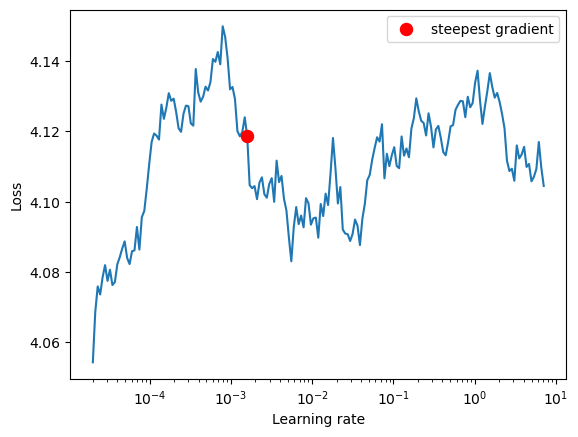

In [6]:
assignment10_trainer = Trainer(model, get_device(), train_loader, test_loader)

In [7]:
assignment10_trainer.exec_train_test_loop()

[INFO] Epoch #1


Loss=1.0951244831085205 Batch_id=97 Accuracy=50.00% LR=0.00045430119934900237: 100%|██████████| 98/98 [01:22<00:00,  1.19it/s]



Test set: Average loss: 1.0234, Accuracy: 6439/10000 (64.39%)

[INFO] Epoch #2


Loss=0.8190544843673706 Batch_id=97 Accuracy=67.21% LR=0.0007527917072645419: 100%|██████████| 98/98 [01:24<00:00,  1.16it/s] 



Test set: Average loss: 0.7753, Accuracy: 7307/10000 (73.07%)

[INFO] Epoch #3


Loss=0.7214223146438599 Batch_id=97 Accuracy=74.09% LR=0.0010512822151800812: 100%|██████████| 98/98 [01:26<00:00,  1.13it/s]



Test set: Average loss: 0.7712, Accuracy: 7523/10000 (75.23%)

[INFO] Epoch #4


Loss=0.4560059905052185 Batch_id=97 Accuracy=78.36% LR=0.0013497727230956207: 100%|██████████| 98/98 [01:26<00:00,  1.13it/s]



Test set: Average loss: 0.6329, Accuracy: 7781/10000 (77.81%)

[INFO] Epoch #5


Loss=0.5529508590698242 Batch_id=97 Accuracy=80.97% LR=0.0015721830515308254: 100%|██████████| 98/98 [01:26<00:00,  1.13it/s] 



Test set: Average loss: 0.5168, Accuracy: 8230/10000 (82.30%)

[INFO] Epoch #6


Loss=0.4634891152381897 Batch_id=97 Accuracy=83.03% LR=0.0014902726620446914: 100%|██████████| 98/98 [01:26<00:00,  1.13it/s] 



Test set: Average loss: 0.4854, Accuracy: 8398/10000 (83.98%)

[INFO] Epoch #7


Loss=0.3594234883785248 Batch_id=97 Accuracy=85.28% LR=0.0014083622725585576: 100%|██████████| 98/98 [01:26<00:00,  1.13it/s] 



Test set: Average loss: 0.4378, Accuracy: 8504/10000 (85.04%)

[INFO] Epoch #8


Loss=0.44884440302848816 Batch_id=97 Accuracy=87.42% LR=0.0013264518830724235: 100%|██████████| 98/98 [01:27<00:00,  1.13it/s]



Test set: Average loss: 0.4052, Accuracy: 8621/10000 (86.21%)

[INFO] Epoch #9


Loss=0.28570079803466797 Batch_id=97 Accuracy=88.95% LR=0.0012445414935862895: 100%|██████████| 98/98 [01:26<00:00,  1.13it/s]



Test set: Average loss: 0.3925, Accuracy: 8669/10000 (86.69%)

[INFO] Epoch #10


Loss=0.3070463240146637 Batch_id=97 Accuracy=89.89% LR=0.0011626311041001557: 100%|██████████| 98/98 [01:27<00:00,  1.13it/s] 



Test set: Average loss: 0.4218, Accuracy: 8612/10000 (86.12%)

[INFO] Epoch #11


Loss=0.28408944606781006 Batch_id=97 Accuracy=91.07% LR=0.001080720714614022: 100%|██████████| 98/98 [01:27<00:00,  1.13it/s] 



Test set: Average loss: 0.4004, Accuracy: 8667/10000 (86.67%)

[INFO] Epoch #12


Loss=0.25868040323257446 Batch_id=97 Accuracy=91.68% LR=0.0009988103251278879: 100%|██████████| 98/98 [01:24<00:00,  1.16it/s]



Test set: Average loss: 0.3665, Accuracy: 8800/10000 (88.00%)

[INFO] Epoch #13


Loss=0.18023154139518738 Batch_id=97 Accuracy=92.43% LR=0.0009168999356417538: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 0.3471, Accuracy: 8829/10000 (88.29%)

[INFO] Epoch #14


Loss=0.2033725529909134 Batch_id=97 Accuracy=93.47% LR=0.0008349895461556199: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s] 



Test set: Average loss: 0.3696, Accuracy: 8867/10000 (88.67%)

[INFO] Epoch #15


Loss=0.1807927042245865 Batch_id=97 Accuracy=94.05% LR=0.0007530791566694859: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s] 



Test set: Average loss: 0.3346, Accuracy: 8911/10000 (89.11%)

[INFO] Epoch #16


Loss=0.1538730263710022 Batch_id=97 Accuracy=94.72% LR=0.0006711687671833521: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s] 



Test set: Average loss: 0.2874, Accuracy: 9055/10000 (90.55%)

[INFO] Epoch #17


Loss=0.14680254459381104 Batch_id=97 Accuracy=95.38% LR=0.0005892583776972182: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 0.2873, Accuracy: 9083/10000 (90.83%)

[INFO] Epoch #18


Loss=0.13300330936908722 Batch_id=97 Accuracy=95.95% LR=0.0005073479882110841: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]



Test set: Average loss: 0.2823, Accuracy: 9074/10000 (90.74%)

[INFO] Epoch #19


Loss=0.08318398147821426 Batch_id=97 Accuracy=96.47% LR=0.0004254375987249501: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s] 



Test set: Average loss: 0.3119, Accuracy: 9074/10000 (90.74%)

[INFO] Epoch #20


Loss=0.126456618309021 Batch_id=97 Accuracy=97.03% LR=0.0003435272092388163: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]    



Test set: Average loss: 0.2696, Accuracy: 9140/10000 (91.40%)

[INFO] Epoch #21


Loss=0.055880557745695114 Batch_id=97 Accuracy=97.46% LR=0.0002616168197526823: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s] 



Test set: Average loss: 0.2589, Accuracy: 9190/10000 (91.90%)

[INFO] Epoch #22


Loss=0.05976039543747902 Batch_id=97 Accuracy=97.95% LR=0.00017970643026654826: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s] 



Test set: Average loss: 0.2566, Accuracy: 9190/10000 (91.90%)

[INFO] Epoch #23


Loss=0.052347104996442795 Batch_id=97 Accuracy=98.32% LR=9.779604078041446e-05: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s] 



Test set: Average loss: 0.2492, Accuracy: 9233/10000 (92.33%)

[INFO] Epoch #24


Loss=0.03697311133146286 Batch_id=97 Accuracy=98.45% LR=1.588565129428043e-05: 100%|██████████| 98/98 [01:22<00:00,  1.18it/s]  



Test set: Average loss: 0.2471, Accuracy: 9250/10000 (92.50%)



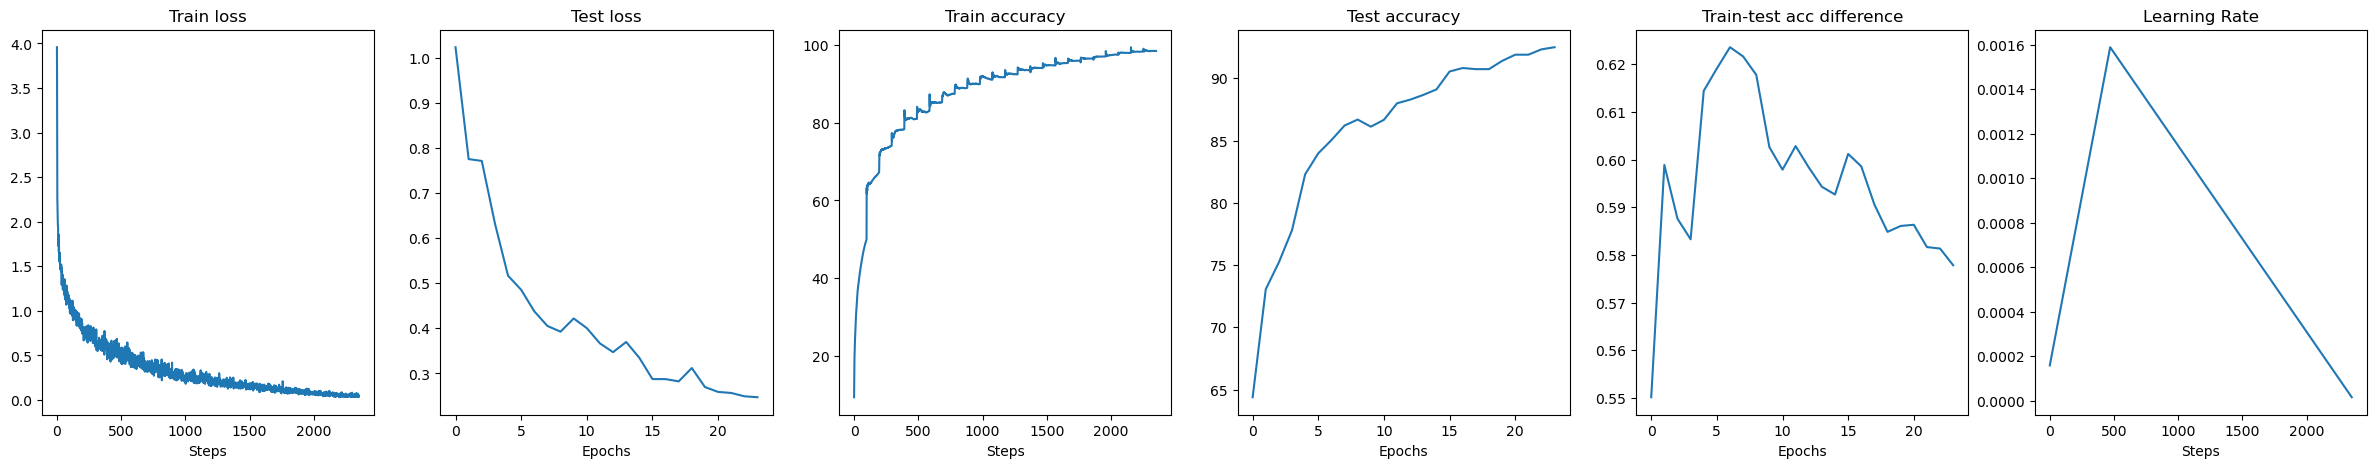

In [8]:
assignment10_trainer.visualize_loss_acc()